# Importing libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style

In [52]:
plt.style.use('seaborn')

# Data

In [53]:
data = pd.read_csv('data/SamDysch_glucose_2-5-2022.csv', skiprows=[0])
data.index = pd.to_datetime(data['Device Timestamp'], format="%d-%m-%Y %H:%M")

/home/sdysch/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
data.isna().sum() / len(data)

Device                               0.000000
Serial Number                        0.000000
Device Timestamp                     0.000000
Record Type                          0.000000
Historic Glucose mmol/L              0.117699
Scan Glucose mmol/L                  0.913418
Non-numeric Rapid-Acting Insulin     1.000000
Rapid-Acting Insulin (units)         1.000000
Non-numeric Food                     1.000000
Carbohydrates (grams)                1.000000
Carbohydrates (servings)             1.000000
Non-numeric Long-Acting Insulin      1.000000
Long-Acting Insulin Value (units)    1.000000
Notes                                0.999537
Strip Glucose mmol/L                 1.000000
Ketone mmol/L                        1.000000
Meal Insulin (units)                 1.000000
Correction Insulin (units)           1.000000
User Change Insulin (units)          1.000000
dtype: float64

In [55]:
to_keep = [
    'Record Type',
    'Historic Glucose mmol/L',
    'Scan Glucose mmol/L',
    'Notes'
]

data = data[to_keep]
data.head()

,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Notes
Device Timestamp,,,,
2019-12-09 19:04:00,0,6.8,NaN,NaN
2019-12-09 19:20:00,0,7.6,NaN,NaN
2019-12-09 19:35:00,0,7.7,NaN,NaN
2019-12-09 19:50:00,0,7.2,NaN,NaN
2019-12-09 20:05:00,0,5.8,NaN,NaN


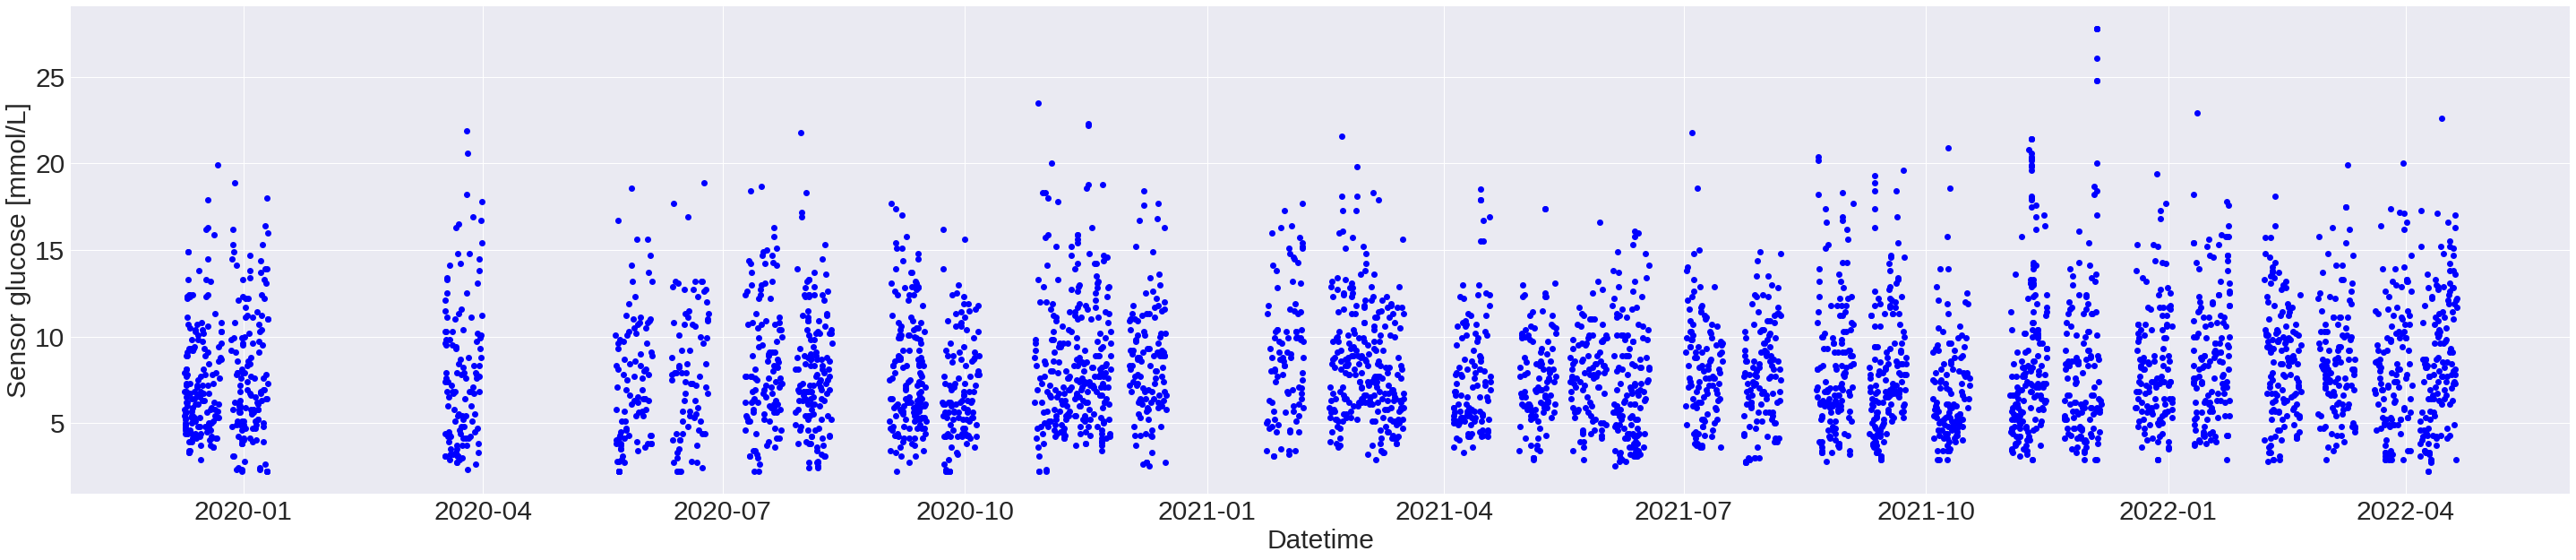

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.plot(data['Scan Glucose mmol/L'], 'bo')
# ax.plot(data['Historic Glucose mmol/L'], 'go')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('Sensor glucose [mmol/L]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

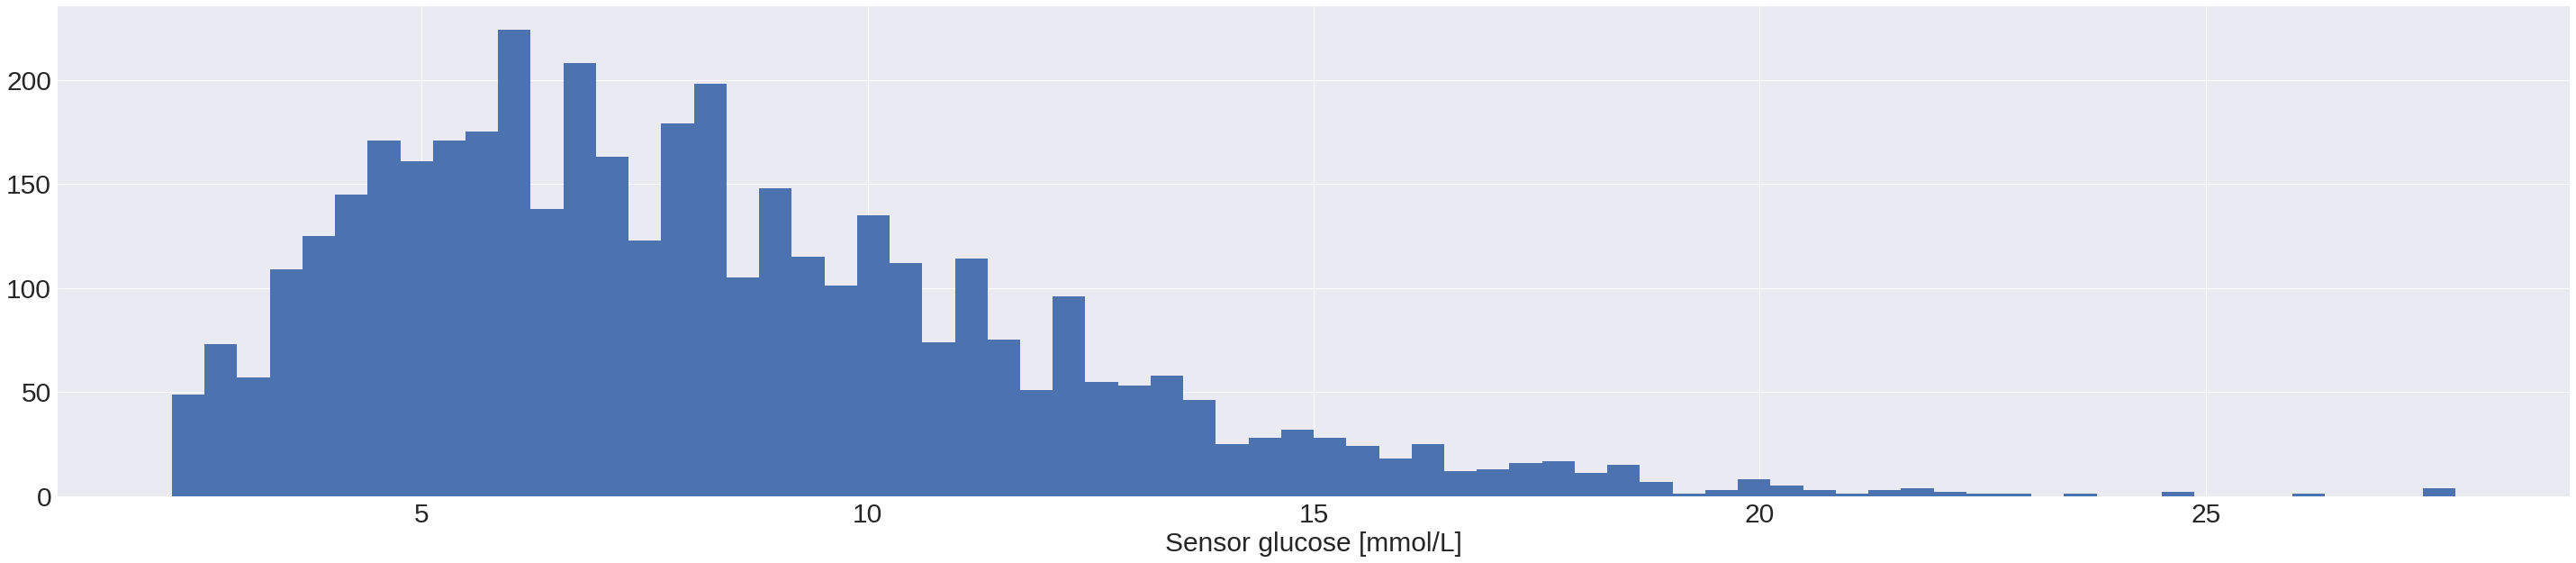

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.hist(data['Scan Glucose mmol/L'], bins=70)
ax.set_xlabel('Sensor glucose [mmol/L]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

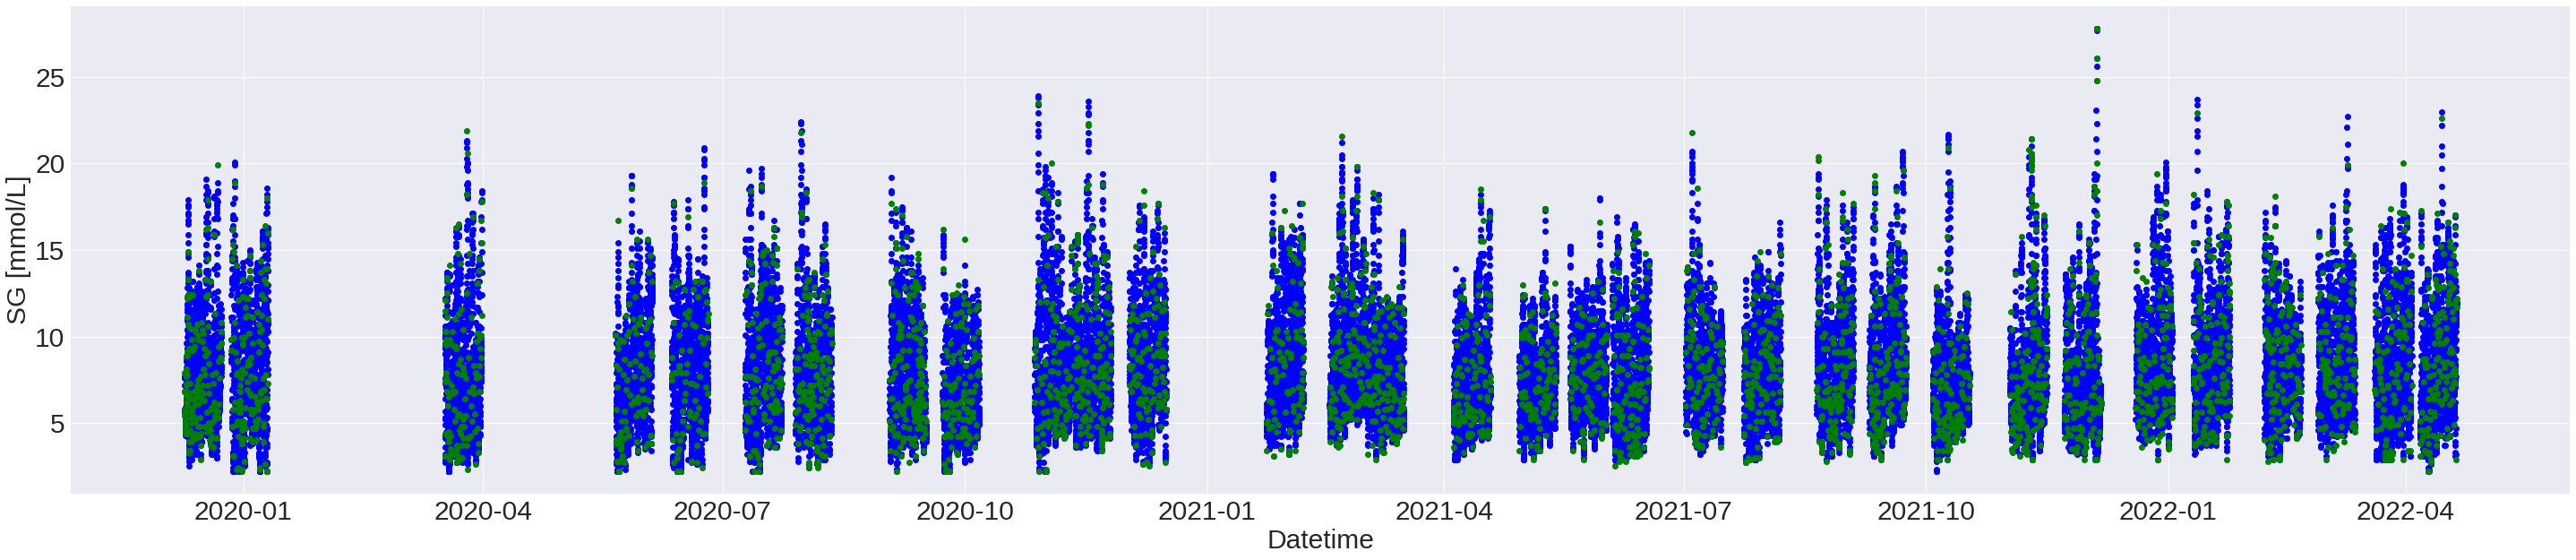

In [69]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#sns.heatmap(data[['Scan Glucose mmol/L', 'Historic Glucose mmol/L']].corr(), annot=True, square=True, ax=ax)
#ax.tick_params(axis='x', labelsize=15)
#ax.tick_params(axis='y', labelsize=15)

#temp = data[['Scan Glucose mmol/L', 'Historic Glucose mmol/L']].dropna()
#temp

fraction = 1.0
fraction = int(fraction * len(data))
data_view = data.iloc[:fraction].copy(deep=True)
historic_when_scan_nan = data_view[data_view['Scan Glucose mmol/L'].isna()]['Historic Glucose mmol/L']
scan_when_historic_nan = data_view[data_view['Historic Glucose mmol/L'].isna()]['Scan Glucose mmol/L']

fig, ax = plt.subplots(1, 1, figsize=(50, 10))
ax.plot(historic_when_scan_nan, 'bo', label='historic')
ax.plot(scan_when_historic_nan, 'go', label='scan')
ax.set_xlabel('Datetime', fontsize=30)
ax.set_ylabel('SG [mmol/L]', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

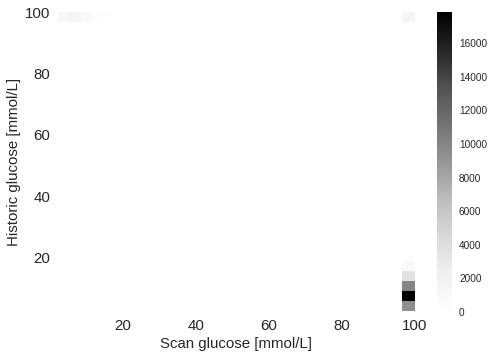

In [102]:
# fill NaNs to unphysical value
scan = data['Scan Glucose mmol/L'].fillna(-1)
historic = data['Historic Glucose mmol/L'].fillna(-1)

# print(scan[scan['Scan Glucose mmol/L'] != -1])
# print(historic[historic['Historic Glucose mmol/L'] != -1])

fig, ax = plt.subplots()
h = ax.hist2d(scan, historic, bins=30);
fig.colorbar(h[3], ax=ax);

ax.set_xlabel('Scan glucose [mmol/L]', fontsize=15)
ax.set_ylabel('Historic glucose [mmol/L]', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)